In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
import os

In [ ]:
train_path = '/content/drive/MyDrive/cotton/Cotton D/Test'
valid_path = '/content/drive/MyDrive/cotton/Cotton D/Train'

In [ ]:
inception = InceptionV3(input_shape=[224,224,3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 2s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
classes=os.listdir('/content/drive/MyDrive/Cotton D/Test')

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(classes), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cotton D/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')


Found 1091 images belonging to 7 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Cotton D/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 270 images belonging to 7 classes.


In [ ]:
r = model.fit_generator( training_set,validation_data=test_set,epochs=20,steps_per_epoch=len(training_set),callbacks=[keras.callbacks.EarlyStopping(patience=3)],validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
35/35 [==============================] - 160s 5s/step - loss: 1.9119 - accuracy: 0.8955 - val_loss: 5.8089 - val_accuracy: 0.7852
Epoch 2/20
35/35 [==============================] - 160s 5s/step - loss: 1.4126 - accuracy: 0.9203 - val_loss: 5.6261 - val_accuracy: 0.7630
Epoch 3/20
35/35 [==============================] - 162s 5s/step - loss: 0.9307 - accuracy: 0.9386 - val_loss: 5.7157 - val_accuracy: 0.7667
Epoch 4/20
35/35 [==============================] - 161s 5s/step - loss: 1.0335 - accuracy: 0.9285 - val_loss: 5.9180 - val_accuracy: 0.7778
Epoch 5/20
35/35 [==============================] - 163s 5s/step - loss: 0.9847 - accuracy: 0.9377 - val_loss: 5.5033 - val_accuracy: 0.7667
Epoch 6/20
35/35 [==============================] - 163s 5s/step - loss: 0.8280 - accuracy: 0.9349 - val_loss: 5.3162 - val_accuracy: 0.7852
Epoch 7/20
35/35 [==============================] - 163s 5s/step - loss: 0.9275 - accuracy: 0.9331 - val_loss: 6.1918 - val_accuracy: 0.7630
Epoch 8/20
35

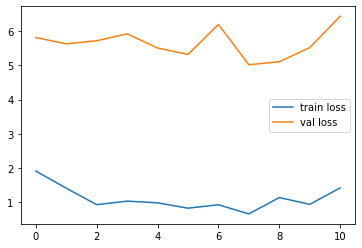

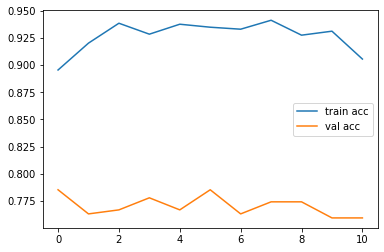

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')